# Cost Of Health Insurance


### In this data, I try to predict the cost of health insurance-"charges".
I think BMI and smoking are the parameters that influence the most on the cost of insurance, but it will be interesting to find out if living area and number of children also affect it.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
insurance=pd.read_csv('/Users/ortal/Desktop/OneDrive - Ariel University/שיעורים/AI/proiect/dataset/insurance.csv')
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


* There is 1338 raws and 7 columns 

## Explanation 
**Age**- The age in years\
**BMI**-Body mass index (BMI) is an approximate measure of the total body fat.
 It is calculated by dividing the weight in kilograms by the height in metres squared (m^2). The ideal bmi is 18.5 to 24.9.\ 
**Children**- Number of children covered by health insurance / Number of dependents
**region**- This data is about USA, so there is  4 kind of region:
* Southwest
* Southeast
* Northwest
* Northeast

**Charge**- Individual medical costs billed by health insurance

## Information

In [3]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There is no null values in this data, so we can work with it.

In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Accordind to this chart:
- Age is between 18 and 64 years. The mean age is 39.
- BMI is between 15.96 and 53.13. The mean bmi is 30.66.
- The numbers of children are between 0 and 5. The mean number of children is 1.09.
- Charges are between 1121.87 dollars, and 63770.43 dollars. The mean charges are 13,270.42$

## Age
lets see how many there is from each age

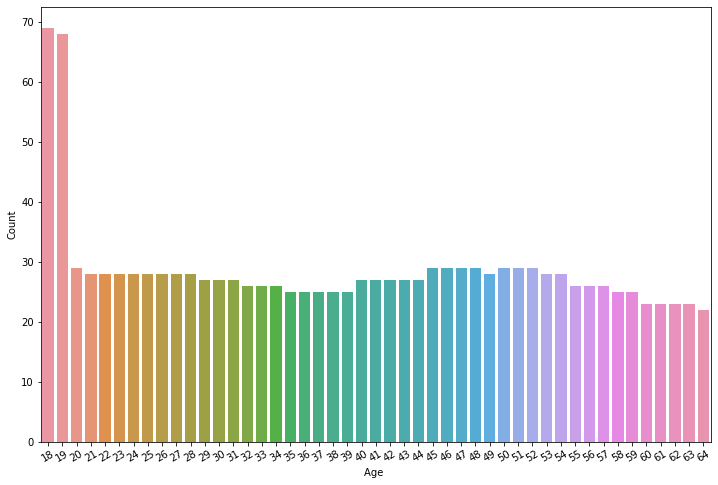

In [5]:
age_ = insurance['age'].value_counts()
plt.figure(figsize=(12,8))
_ = sns.barplot(x=age_.index,y= age_.values)
plt.xlabel("Age ")
plt.ylabel("Count")
for item in _.get_xticklabels():
    item.set_rotation(30)
plt.show()

* <B> we can see that there is more claients in 18-19 groups than in any other age group.

## BMI
### lets look at the distribution of the BMI
#### general distribution:

The mean bmi is: 30.663396860986538


<Figure size 864x576 with 0 Axes>

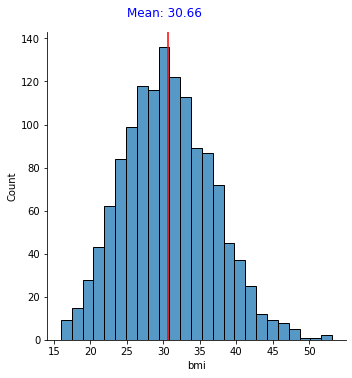

In [6]:
plt.figure(figsize=(12,8));
sns.displot(insurance['bmi'])
plt.axvline(insurance["bmi"].mean(), c="r")
plt.text(25,150,'Mean: 30.66',rotation=0, size ="large", c="b");
bmi_mean=insurance["bmi"].mean()
print(f"The mean bmi is: {bmi_mean}")


#### Distribution By Gender And The Mean:

The mean bmi of each gender: sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64


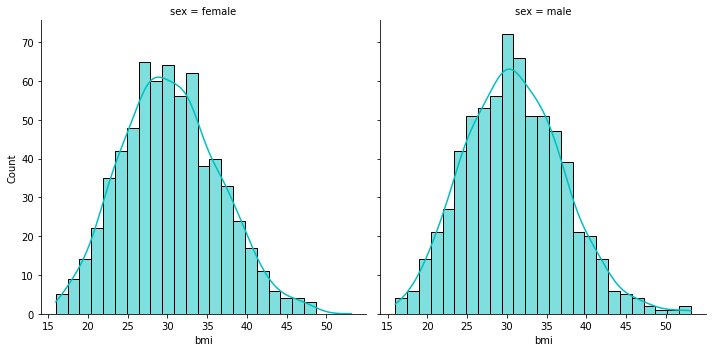

In [7]:
sns.displot(data=insurance, x="bmi", col="sex",kde=True, color='c' )
sex_bmi_mean=insurance.groupby('sex').bmi.mean()
print(f"The mean bmi of each gender: {sex_bmi_mean}")

* <B> We can see that there is minimal diference between the genders. 

## charges
### lets look at the distribution of charges
#### general distribution:

The average charge is: 13270.422265141257₪


<Figure size 3600x576 with 0 Axes>

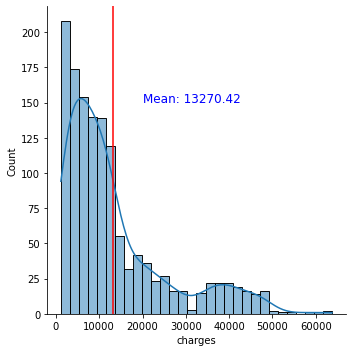

In [8]:
plt.figure(figsize=(50,8));
sns.displot(insurance['charges'], bins=30,kde=True)
plt.axvline(insurance["charges"].mean(), c="r")
plt.text(20000,150,'Mean: 13270.42',rotation=0, size ="large", c="b");
mean_charg=insurance["charges"].mean()
print(f"The average charge is: {mean_charg}₪")

* <B> We can see that the maen charges is 13270 dollars and that most of the people paies less than 10000 dollars.

#### Distribution By Gender

Average charges by each gender: sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


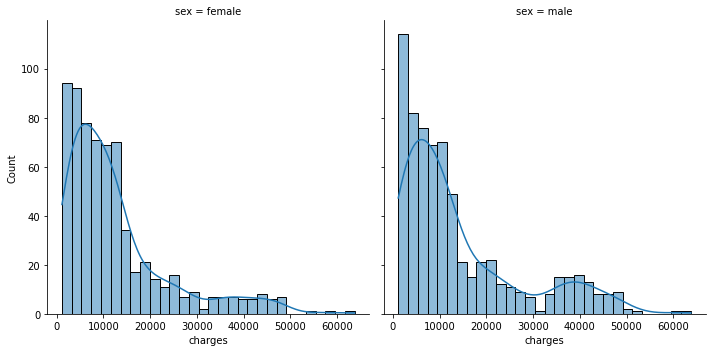

In [9]:
sns.displot(data=insurance, x="charges", col="sex",kde=True )
sex_bmi_mean=insurance.groupby('sex').charges.mean()
print(f"Average charges by each gender: {sex_bmi_mean}")

* <B> We can see that the insurance for males is higher than for females.
* We have seen that the mean BMI is similar between the two genders. It is possible that the differences in insurance costs between the genders are due to smoking habits.



### Distribution By Smoking Habits


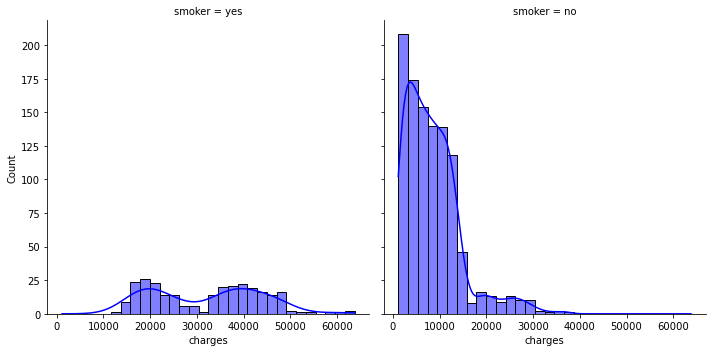

In [10]:
sns.displot(data=insurance, x="charges", col="smoker",kde=True, color='b' )



Average charges by smoking habits: smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


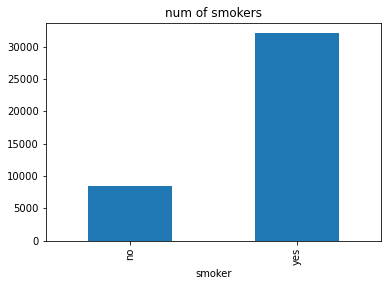

In [11]:
smoker_charge_mean=insurance.groupby('smoker').charges.mean()
smoker_charge_mean.plot(kind='bar', title="num of smokers")
print(f"Average charges by smoking habits: {smoker_charge_mean}")

* <B> Unsuprisely, we can see that the insurance for smokers is higher than for non-smokers.

### Average By Children:

Average charges by num of children: children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


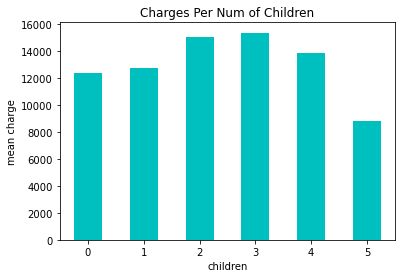

In [12]:
chil_charg_mean=insurance.groupby('children').charges.mean()
print(f"Average charges by num of children: {chil_charg_mean}")
children=chil_charg_mean.plot(kind='bar', title="Charges Per Num of Children", color='c')
for item in children.get_xticklabels():
    item.set_rotation(0)
plt.ylabel("mean charge")
plt.show()

* <B> We can see that the charge for someone who have 2-4 cildren is higher than someone with no children at all or with 1 or 5 children

### Smoking
Lets see how mach smokers there are:


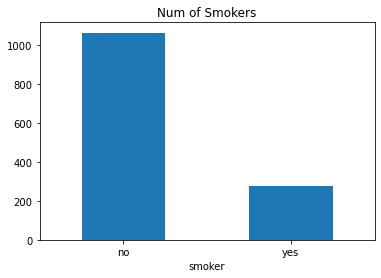

In [13]:
smokers=insurance.groupby('smoker').charges.count().plot(kind='bar', title="Num of Smokers")
for item in smokers.get_xticklabels():
    item.set_rotation(0)
plt.show()


* <B> There is more non-smokers than smokers. 
* Lets see who smoke more: males or females.

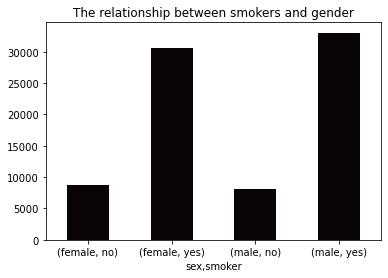

sex     smoker
female  no         8762.297300
        yes       30678.996276
male    no         8087.204731
        yes       33042.005975
Name: charges, dtype: float64

In [14]:
sex_smoker=insurance.groupby(['sex', 'smoker']).charges.mean().plot(kind='bar', colormap='mako', title="The relationship between smokers and gender")
for item in sex_smoker.get_xticklabels():
    item.set_rotation(0)
plt.show()
insurance.groupby(['sex', 'smoker']).charges.mean()

* <B> We can see that there are more males who smokes than females. It can be the reason why males charges is higher.

### Region:

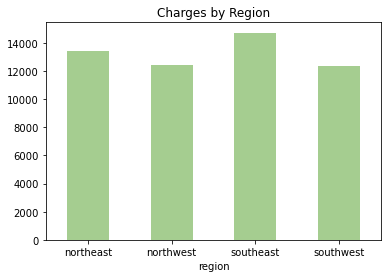

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [15]:
region_=insurance.groupby('region').charges.mean().plot(kind='bar', colormap='crest', title="Charges by Region")
for item in region_.get_xticklabels():
    item.set_rotation(0)
plt.show()
insurance.groupby('region').charges.mean()


* <B> We can see that there is diffrences between the regions. Southeast average charges is higher than elsewear. lets look if there is correlation between region and smoking.

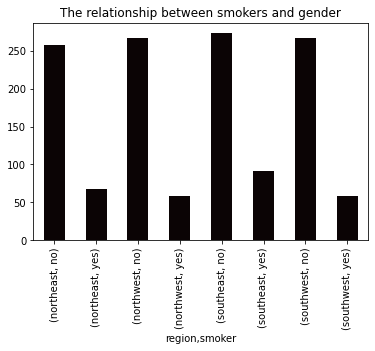

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: charges, dtype: int64

In [16]:
children_region=insurance.groupby(['region', 'smoker']).charges.count().plot(kind='bar', colormap='mako', title="The relationship between smokers and gender")
for item in sex_smoker.get_xticklabels():
    item.set_rotation(0)
plt.show()
insurance.groupby(['region', 'smoker']).charges.count()

* <B> We can see that there is more smokers in the southwest region, and it can be the reason.\
let see the correlation between charges, smoking and BMI:

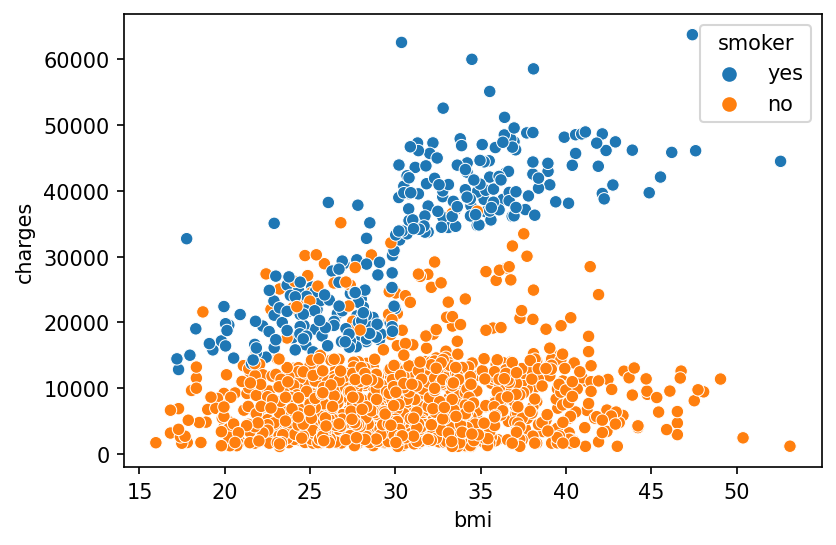

In [17]:
plt.figure(dpi = 150)
sns.scatterplot(x=insurance['bmi'], y=insurance['charges'], hue=insurance['smoker'])
plt.show()

* <B> It can be seen that the highest charges were for smokers with a high BMI, while the lowest charges were given for non-smokers with a mean-low BMI.


## Changing The Value To Numeric:

In [18]:

#change female=0, male=1
insurance['sex_code']=pd.factorize(insurance.sex)[0]
#change yes=0, no=1
insurance['smoker_code']=pd.factorize(insurance.smoker)[0]
#change southwest=0, southeast=1,northwest=2,northeast=3
insurance['region_code']=pd.factorize(insurance.region)[0]

insurance.head()

,age,sex,bmi,children,smoker,region,charges,sex_code,smoker_code,region_code
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


### lets drop the columns with the original data that we change to "code_gender":

In [19]:
insurance.drop(['sex','smoker', 'region'],axis=1 ,inplace = True)
insurance.head()

,age,bmi,children,charges,sex_code,smoker_code,region_code
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2


## Corrolation:

In [20]:
insurance.corr()

,age,bmi,children,charges,sex_code,smoker_code,region_code
age,1.000000,0.109272,0.042469,0.299008,-0.020856,0.025019,-0.002127
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,-0.003750,-0.157566
children,0.042469,0.012759,1.000000,0.067998,0.017163,-0.007673,-0.016569
charges,0.299008,0.198341,0.067998,1.000000,0.057292,-0.787251,0.006208
sex_code,-0.020856,0.046371,0.017163,0.057292,1.000000,-0.076185,-0.004588
smoker_code,0.025019,-0.003750,-0.007673,-0.787251,-0.076185,1.000000,-0.002181
region_code,-0.002127,-0.157566,-0.016569,0.006208,-0.004588,-0.002181,1.000000


Text(0.5, 1.0, 'Correlation Between The Parameters')

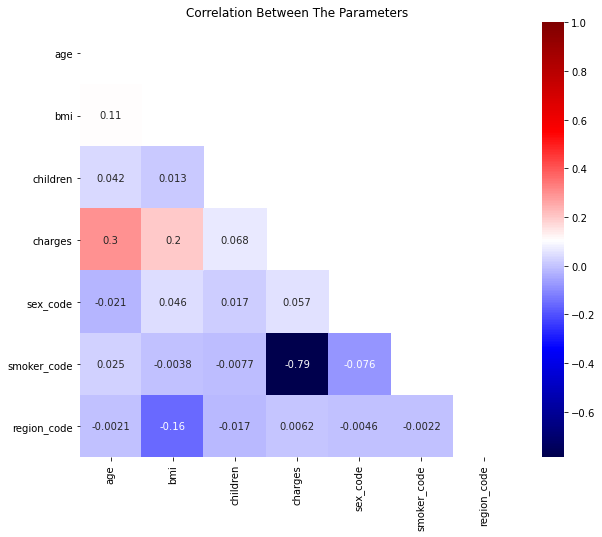

In [21]:
mask = np.zeros_like(insurance.corr())
mask[np.tril_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 8))
corr = insurance.corr()
sns.heatmap(corr, vmax=1,annot=True,cmap='seismic', mask=mask.T,square=True)

plt.title('Correlation Between The Parameters')

*<B> We can see that there is negative corolation between charges and smoking: -0.79 . Its means that the cost go higher if you smoke.\
* The corollation between BMI and charges don't look right, lets split it. 


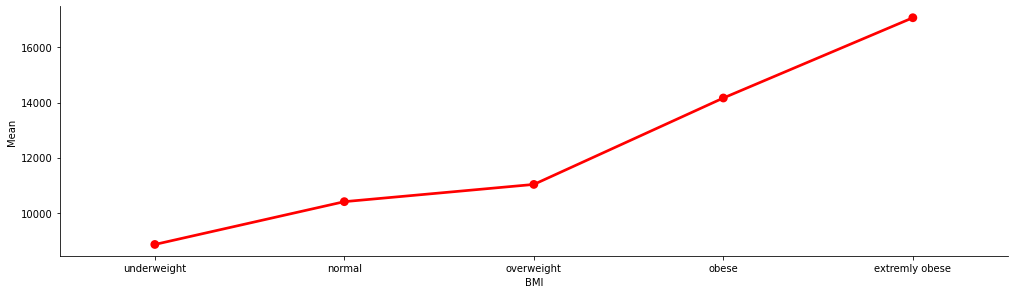

In [22]:
underweight=insurance[insurance["bmi"]<18.5]["charges"].mean()
normal=insurance[(insurance['bmi'] > 18.5) & (insurance['bmi'] < 24.9)]["charges"].mean()
overweight=insurance[(insurance['bmi'] > 24.9) & (insurance['bmi'] < 29.9)]["charges"].mean()
obese=insurance[(insurance['bmi'] > 29.9) & (insurance['bmi'] < 34.9)]["charges"].mean()
extremly_obese=insurance[insurance["bmi"]>34.9]["charges"].mean()
bmi_category=["underweight","normal","overweight","obese","extremly obese"]
list_mean=[underweight,normal,overweight,obese,extremly_obese]
d={'BMI':bmi_category,'Mean':list_mean}    
bmi_frame=pd.DataFrame(d)
bmi_frame

sns.catplot(x='BMI',y='Mean',data=bmi_frame,kind='point',height=4,aspect=3.5, color='r')
 

* <B> We can see that the insurance for poeple with high or very high BMI is more expensive than people with low BMI.


## Preparing The Data:

#### Train-Tast split:

In [23]:
from sklearn.model_selection import train_test_split 
x =insurance.drop("charges", axis=1).values
y =insurance["charges"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)


#### Normalization:

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

print("x_train : ",x_train)
print ('x train size is:' ,x_train.shape)
print ()
print("x_test : ",x_test)
print ('x test size is:' ,x_test.shape)
print ()
print("y_train : ",y_train)
print ('y train size is:' ,y_train.shape)
print ()
print("y_test : ",y_test)
print ('y test size is:' ,y_test.shape)
print ()
print(f'Size of Training set: {len(x_train), len(y_train)}')
print(f'Size of Test set {len(x_test), len(y_test)}')

x_train :  [[ 1.3887357  -0.45325739  1.58709833 -1.01761142  0.51476619 -0.48173474]
 [ 1.45903589 -0.78538769 -0.91687451  0.98269338  0.51476619 -0.48173474]
 [-0.79057043  0.72932779 -0.91687451 -1.01761142  0.51476619  0.41675656]
 ...
 [ 1.3184355  -0.88016225 -0.91687451  0.98269338  0.51476619  1.31524787]
 [-0.15786865  2.88146507  0.75244072 -1.01761142 -1.94262954 -1.38022604]
 [ 1.10753491 -0.08757857 -0.91687451  0.98269338  0.51476619 -1.38022604]]
x train size is: (802, 6)

x_test :  [[ 0.40453293 -0.88016225  0.75244072 -1.01761142  0.51476619  1.31524787]
 [-0.22816885 -0.06744946 -0.91687451 -1.01761142  0.51476619  0.41675656]
 [ 1.74023668 -0.59332244 -0.91687451 -1.01761142 -1.94262954  0.41675656]
 ...
 [-0.43906944 -0.97577552  0.75244072  0.98269338  0.51476619  0.41675656]
 [ 0.68573372 -1.21480869  0.75244072 -1.01761142  0.51476619  0.41675656]
 [ 1.1778351   0.53810125 -0.91687451  0.98269338 -1.94262954  0.41675656]]
x test size is: (536, 6)

y_train :  [14

# Modeling:

## Linear Regression:

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
lr = LinearRegression()
# training the data
lr.fit(x_train,y_train)
#predicting
y_pred_lr = lr.predict(x_test)



### Accuracy

In [31]:
from sklearn import metrics
r2_value_lr = r2_score(y_test, y_pred_lr)                     
print("R^2 Value:", r2_value_lr)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

R^2 Value: 0.7619016217522223
Mean Absolute Error: 4244.393122087878
Mean Squared Error: 35513501.260346785
Root Mean Squared Error: 5959.320536801723


## Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
# training the data
rf.fit(x_train, y_train)
#predicting
y_pred_rf = rf.predict(x_test)


### Accuracy:

In [33]:
r2_value_rf = r2_score(y_test, y_pred_rf)                     
print("R^2 Value:", r2_value_rf)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

R^2 Value: 0.838583256664294
Mean Absolute Error: 2675.812246216418
Mean Squared Error: 24076072.084490024
Root Mean Squared Error: 4906.737417519917


## Dummy Regressor

In [34]:
from sklearn.dummy import DummyRegressor
dummy_reg = DummyRegressor(strategy="mean")
# training the data
dummy_reg.fit(x_train, y_train)
#predicting
y_pred_dum=dummy_reg.predict(x_test)


## Accuracy:

In [35]:
r2_value_dum = r2_score(y_test, y_pred_dum)                     
print("R^2 Value:", r2_value_rf)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dum))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_dum))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)))

R^2 Value: 0.838583256664294
Mean Absolute Error: 9243.737021712746
Mean Squared Error: 149159396.61891738
Root Mean Squared Error: 12213.083010399847


* <B> We can see that the R2 value of the dummy model is pretty close to Random Forest model, but if we look at the absolute error, we can see that in the Dummy model the percentage of errors is much higher than the Random Forest model. 

In [37]:
model_names=['LinearRegression','RandomForestRegressor','Dummy Regressor']
acc=[0.7619016217522223,0.838583256664294,0.838583256664294]

d={'Modelling':model_names,'Accuracy':acc}    
acc_frame=pd.DataFrame(d)
acc_frame



,Modelling,Accuracy
0,LinearRegression,0.761902
1,RandomForestRegressor,0.838583
2,Dummy Regressor,0.838583


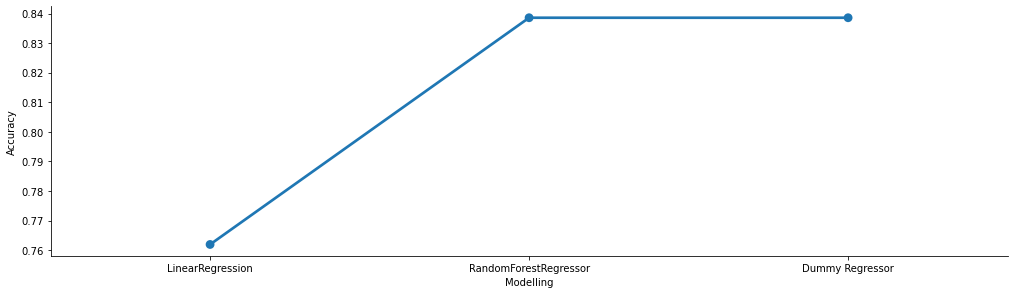

In [38]:
sns.catplot(x='Modelling',y='Accuracy',data=acc_frame,kind='point',height=4,aspect=3.5)

# conclusion:
In this data, we examined the correlation between a person's lifestyle and life characteristics and his or her health insurance costs.
In presenting the data, we saw that there is a relationship between smoking habits and the level of BMI and the level of insurance payment costs.
At the model stage we saw that the highest percentage of accuracy is of the Random Forest Regressor model with 83% accuracy.